# Ensemble Learning 
- Bagging and Boosting 
## Bagging 
- Aim is to decrease variance
- Aynı veya farklı türden birden fazla "base learner" kullanılarak veri setinin farklı örnekleri üzerinde bu modeller eğitilir 
- Sonrasında Classification Tasklerinde -> Majority Voting 
- Regression Tasklerinde -> Averaging yöntemi kullanılır 
- Models are trained in "parallel"
- Random Forest
## Boosting 
- Aim is to reduce bias 
- Weak learners 
- models are trained sequentially

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sys 
import warnings 

%matplotlib inline
sys.path.append('/Users/user/Desktop/Projects/data-science/utils')
warnings.filterwarnings(action="ignore")


In [13]:
from SetupDataFrame import SetupDataFrame
from AnalyzeDataFrame import AnalyzeDataFrame
from VisualizeDataFrame import VisualizeDataFrame
from EvalModel import EvalModel
from HyperParameterTuning import HyperParameterTuning
from PreprocessDataFrame import PreprocessDataFrame

In [14]:
setup_df         =   SetupDataFrame()
analyze_df       =   AnalyzeDataFrame()
visualize_df     =   VisualizeDataFrame()
eval_model       =   EvalModel()
hp_tuning_model  =   HyperParameterTuning()
preprocess_model =   PreprocessDataFrame()

In [15]:
df = setup_df.setup_ml("14-income_evaluation.csv")

In [16]:
analyze_df.check_df(df)

***************************************** SHAPE ******************************************
(32561, 15)
***************************************** TYPES ******************************************
age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object
****************************************** HEAD ******************************************
   age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th 

In [17]:
analyze_df.analyze_df(df)

**************************************** COLUMNS *****************************************
Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')
**************************************** DF INFO *****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  

In [50]:
cat_cols, num_cols, _ = analyze_df.grab_col_names(df)

Observations: 32561
Variables: 15
cat_cols: 8
num_cols: 6
cat_but_car: 1
num_but_cat: 0

Categorical Cols: ['WORKCLASS', 'EDUCATION', 'MARITAL-STATUS', 'OCCUPATION', 'RELATIONSHIP', 'RACE', 'SEX', 'INCOME']

Numerical Cols: ['AGE', 'FINAL-WEIGHT', 'EDUCATION-NUM', 'CAPITAL-GAIN', 'CAPITAL-LOSS', 'HOURS-PER-WEEK']

Categorical but cardinal Cols: ['NATIVE-COUNTRY']


In [22]:
for col in num_cols:
    print(preprocess_model.chech_outlier(df, col))

True
True
True
True
True
True


In [28]:
for col in num_cols:
    index = preprocess_model.grab_outliers(df, col, index=True)

      age          workclass   fnlwgt      education   education-num  \
74     79            Private   124744   Some-college              10   
222    90            Private    51744        HS-grad               9   
430    80                  ?   107762        HS-grad               9   
918    81   Self-emp-not-inc   136063        HS-grad               9   
1040   90            Private   137018        HS-grad               9   

           marital-status        occupation     relationship    race      sex  \
74     Married-civ-spouse    Prof-specialty   Other-relative   White     Male   
222         Never-married     Other-service    Not-in-family   Black     Male   
430               Widowed                 ?    Not-in-family   White     Male   
918    Married-civ-spouse   Exec-managerial          Husband   White     Male   
1040        Never-married     Other-service    Not-in-family   White   Female   

       capital-gain   capital-loss   hours-per-week  native-country  income  
74

In [31]:
len(index)

9008

In [32]:
df.columns = df.columns.str.strip()

In [33]:
df.columns = df.columns.str.upper()

In [38]:
df.rename(columns={"FNLWGT": "FINAL-WEIGHT"}, inplace=True)

In [39]:
df

,AGE,WORKCLASS,FINAL-WEIGHT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,INCOME
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [41]:
analyze_df.check_df(df)

***************************************** SHAPE ******************************************
(32561, 15)
***************************************** TYPES ******************************************
AGE                int64
WORKCLASS         object
FINAL-WEIGHT       int64
EDUCATION         object
EDUCATION-NUM      int64
MARITAL-STATUS    object
OCCUPATION        object
RELATIONSHIP      object
RACE              object
SEX               object
CAPITAL-GAIN       int64
CAPITAL-LOSS       int64
HOURS-PER-WEEK     int64
NATIVE-COUNTRY    object
INCOME            object
dtype: object
****************************************** HEAD ******************************************
   AGE          WORKCLASS  FINAL-WEIGHT   EDUCATION  EDUCATION-NUM  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   
3   53            Private        234721       

In [42]:
analyze_df.analyze_df(df)

**************************************** COLUMNS *****************************************
Index(['AGE', 'WORKCLASS', 'FINAL-WEIGHT', 'EDUCATION', 'EDUCATION-NUM',
       'MARITAL-STATUS', 'OCCUPATION', 'RELATIONSHIP', 'RACE', 'SEX',
       'CAPITAL-GAIN', 'CAPITAL-LOSS', 'HOURS-PER-WEEK', 'NATIVE-COUNTRY',
       'INCOME'],
      dtype='object')
**************************************** DF INFO *****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             32561 non-null  int64 
 1   WORKCLASS       32561 non-null  object
 2   FINAL-WEIGHT    32561 non-null  int64 
 3   EDUCATION       32561 non-null  object
 4   EDUCATION-NUM   32561 non-null  int64 
 5   MARITAL-STATUS  32561 non-null  object
 6   OCCUPATION      32561 non-null  object
 7   RELATIONSHIP    32561 non-null  object
 8   RACE  

In [48]:
str_cols = df.select_dtypes(include='object').columns
for col in str_cols:
    print(col)
    df[col] = df[col].str.strip()


WORKCLASS
EDUCATION
MARITAL-STATUS
OCCUPATION
RELATIONSHIP
RACE
SEX
NATIVE-COUNTRY
INCOME


In [49]:
analyze_df.analyze_df(df)

**************************************** COLUMNS *****************************************
Index(['AGE', 'WORKCLASS', 'FINAL-WEIGHT', 'EDUCATION', 'EDUCATION-NUM',
       'MARITAL-STATUS', 'OCCUPATION', 'RELATIONSHIP', 'RACE', 'SEX',
       'CAPITAL-GAIN', 'CAPITAL-LOSS', 'HOURS-PER-WEEK', 'NATIVE-COUNTRY',
       'INCOME'],
      dtype='object')
**************************************** DF INFO *****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             32561 non-null  int64 
 1   WORKCLASS       32561 non-null  object
 2   FINAL-WEIGHT    32561 non-null  int64 
 3   EDUCATION       32561 non-null  object
 4   EDUCATION-NUM   32561 non-null  int64 
 5   MARITAL-STATUS  32561 non-null  object
 6   OCCUPATION      32561 non-null  object
 7   RELATIONSHIP    32561 non-null  object
 8   RACE  

In [54]:
df.loc[index, :]

,AGE,WORKCLASS,FINAL-WEIGHT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,INCOME
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
20,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32544,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32548,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


In [56]:
df["WORKCLASS"] = df["WORKCLASS"].replace("?", np.nan)
df["OCCUPATION"] = df["OCCUPATION"].replace("?", np.nan)
df["NATIVE-COUNTRY"] = df["NATIVE-COUNTRY"].replace("?", np.nan)

In [57]:
df.isnull().sum()

AGE                  0
WORKCLASS         1836
FINAL-WEIGHT         0
EDUCATION            0
EDUCATION-NUM        0
MARITAL-STATUS       0
OCCUPATION        1843
RELATIONSHIP         0
RACE                 0
SEX                  0
CAPITAL-GAIN         0
CAPITAL-LOSS         0
HOURS-PER-WEEK       0
NATIVE-COUNTRY     583
INCOME               0
dtype: int64

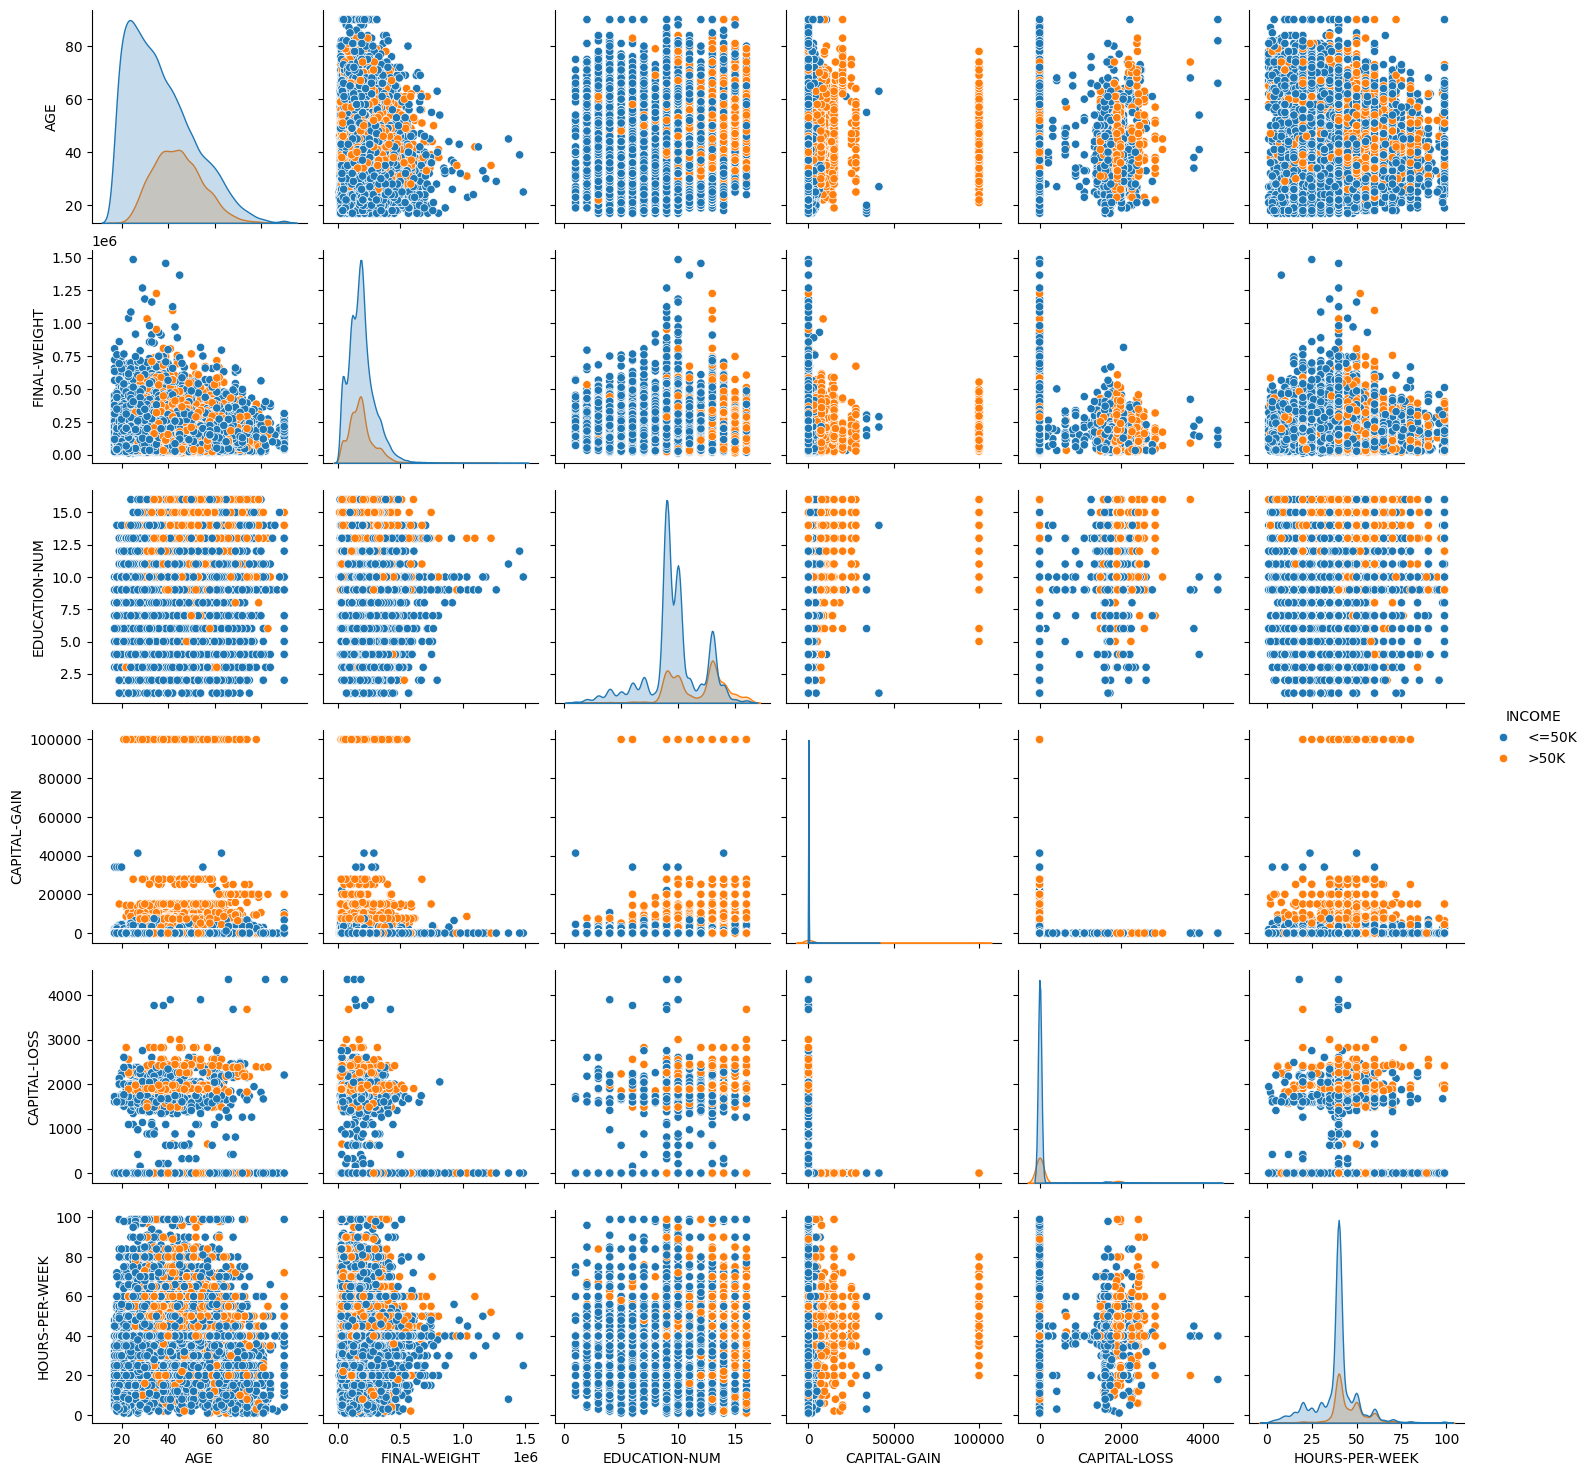

In [58]:
sns.pairplot(df, hue="INCOME")
plt.show()

In [59]:
X = df.drop("INCOME", axis=1)
y = df["INCOME"]

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
for data in [X_train, X_test]:
    data["WORKCLASS"]      =    data["WORKCLASS"].fillna(X_train["WORKCLASS"].mode()[0]) 
    data["OCCUPATION"]     =    data["OCCUPATION"].fillna(X_train["OCCUPATION"].mode()[0]) 
    data["NATIVE-COUNTRY"] =    data["NATIVE-COUNTRY"].fillna(X_train["NATIVE-COUNTRY"].mode()[0]) 

In [66]:
# cat_cols.remove("INCOME")
X_train[cat_cols].isnull().sum()
X_test[cat_cols].isnull().sum()

WORKCLASS         0
EDUCATION         0
MARITAL-STATUS    0
OCCUPATION        0
RELATIONSHIP      0
RACE              0
SEX               0
dtype: int64

In [70]:
y_train_binary = y_train.apply(lambda x: 1 if x == ">50K" else 0)

In [71]:
y_train_binary

19749    0
1216     1
27962    0
23077    0
10180    0
        ..
29802    0
5390     0
860      0
15795    0
23654    0
Name: INCOME, Length: 22792, dtype: int64

In [73]:
target_means = y_train_binary.groupby(X_train["NATIVE-COUNTRY"]).mean()

In [74]:
X_train["NATIVE-COUNTRY-ENCODED"] = X_train["NATIVE-COUNTRY"].map(target_means)
X_train["NATIVE-COUNTRY-ENCODED"] = X_train["NATIVE-COUNTRY"].fillna(y_train_binary.mean())

X_test["NATIVE-COUNTRY-ENCODED"] = X_test["NATIVE-COUNTRY"].map(target_means)
X_test["NATIVE-COUNTRY-ENCODED"] = X_test["NATIVE-COUNTRY"].fillna(y_train_binary.mean())

In [75]:
X_train.drop("NATIVE-COUNTRY", axis=1, inplace=True)
X_test.drop("NATIVE-COUNTRY", axis=1, inplace=True)

In [91]:
cat_cols

['WORKCLASS',
 'EDUCATION',
 'MARITAL-STATUS',
 'OCCUPATION',
 'RELATIONSHIP',
 'RACE',
 'SEX']

In [92]:
X_train_encoded = preprocess_model.one_hot_encoder(X_train, cat_cols)
X_test_encoded = preprocess_model.one_hot_encoder(X_test, cat_cols)

In [93]:
X_train_encoded.replace({False: 0, True: 1}, inplace=True)
X_test_encoded.replace({False: 0, True: 1}, inplace=True)

In [94]:
X_train_encoded

,AGE,FINAL-WEIGHT,EDUCATION-NUM,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY-ENCODED,WORKCLASS_Federal-gov,WORKCLASS_Local-gov,WORKCLASS_Never-worked,...,RELATIONSHIP_Own-child,RELATIONSHIP_Unmarried,RELATIONSHIP_Wife,RACE_Amer-Indian-Eskimo,RACE_Asian-Pac-Islander,RACE_Black,RACE_Other,RACE_White,SEX_Female,SEX_Male
19749,34,56460,9,0,2179,12,United-States,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1216,48,243631,10,7688,0,40,United-States,0,0,0,...,0,0,0,1,0,0,0,0,0,1
27962,23,56402,10,0,0,30,United-States,0,0,0,...,0,0,0,0,0,0,0,1,0,1
23077,56,255406,9,0,0,40,United-States,0,1,0,...,0,0,0,0,0,0,0,1,1,0
10180,17,297246,7,0,0,9,United-States,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,47,359461,13,0,0,40,United-States,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5390,31,147215,8,0,0,21,United-States,0,0,0,...,0,1,0,0,0,0,0,1,1,0
860,18,216284,7,0,0,20,United-States,0,0,0,...,1,0,0,0,0,0,0,1,1,0
15795,50,54261,9,0,0,84,United-States,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [95]:
X_train_encoded.drop("NATIVE-COUNTRY-ENCODED", axis=1, inplace=True)
X_test_encoded.drop("NATIVE-COUNTRY-ENCODED", axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [97]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()

# model.fit(X_train_scaled, y_train)

# y_pred = model.predict(X_test_scaled)

# eval_model.eval_class_model(X_test_scaled, y_test, model, visualize=True)

# best_models = hp_tuning_model.hyperparameter_optimization(X_train_scaled, y_train)

# clf = hp_tuning_model.voting_classifier(best_models, X_train_scaled, y_train)